In [1]:
#import libraries

import numpy as np
import pandas as pd
import yfinance as yf
from MCForecastTools import MCSimulation

import warnings
warnings.filterwarnings("ignore")

In [2]:
#set ticker as variable
sp500 = yf.Ticker("^GSPC")

In [3]:
#pull data from yf API and set as DataFrame
sp500_df = sp500.history(period="1d", start="2000-01-01", end="2022-10-01").drop(columns=["Dividends","Stock Splits"])
sp500_df.index.names =["timestamp"]
sp500_df.columns = ["open","high","low","close","volumne"]
sp500_df = pd.concat([sp500_df], axis=1, keys=["S&P500"])
sp500_df

S&P500                                         \
                                  open         high          low        close   
timestamp                                                                       
2000-01-03 00:00:00-05:00  1469.250000  1478.000000  1438.359985  1455.219971   
2000-01-04 00:00:00-05:00  1455.219971  1455.219971  1397.430054  1399.420044   
2000-01-05 00:00:00-05:00  1399.420044  1413.270020  1377.680054  1402.109985   
2000-01-06 00:00:00-05:00  1402.109985  1411.900024  1392.099976  1403.449951   
2000-01-07 00:00:00-05:00  1403.449951  1441.469971  1400.729980  1441.469971   
...                                ...          ...          ...          ...   
2022-09-26 00:00:00-04:00  3682.719971  3715.669922  3644.760010  3655.040039   
2022-09-27 00:00:00-04:00  3686.439941  3717.530029  3623.290039  3647.290039   
2022-09-28 00:00:00-04:00  3651.939941  3736.739990  3640.610107  3719.040039   
2022-09-29 00:00:00-04:00  3687.010010  3687.010010  3610.399902  3640.469971   
2022-09-30 00:00:00-04:00  3633.479980  3671.439941  3584.129883  3585.620117   

                                       
                              volumne  
timestamp                              
2000-01-03 00:00:00-05:00   931800000  
2000-01-04 00:00:00-05:00  1009000000  
2000-01-05 00:00:00-05:00  1085500000  
2000-01-06 00:00:00-05:00  1092300000  
2000-01-07 00:00:00-05:00  1225200000  
...                               ...  
2022-09-26 00:00:00-04:00  4886140000  
2022-09-27 00:00:00-04:00  4577740000  
2022-09-28 00:00:00-04:00  4684850000  
2022-09-29 00:00:00-04:00  4681810000  
2022-09-30 00:00:00-04:00  5645360000  

[5724 rows x 5 columns]

<AxesSubplot:title={'center':'S&P 500 Index Value'}, xlabel='Time', ylabel='Price'>

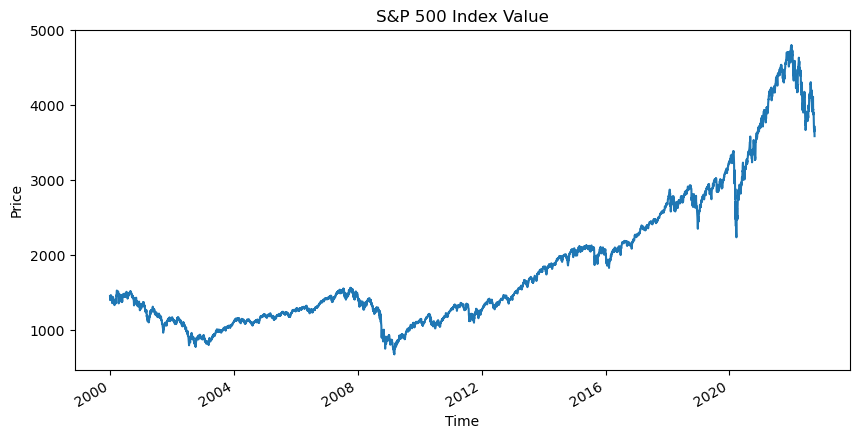

In [4]:
#plot the dataframe as line chart
sp500_df["S&P500"]["close"].plot(title = "S&P 500 Index Value", xlabel = "Time", ylabel = "Price", figsize = (10,5))

In [5]:
# Configure a Monte Carlo simulation to forecast five years daily returns
sp500_five_year_sim = MCSimulation(
    portfolio_data = sp500_df,
    num_simulation = 1000,
    num_trading_days = 252 * 5)

In [6]:
# Run Monte Carlo simulations to forecast five years daily returns
sp500_five_year_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998376,0.999670,1.006136,0.988383,1.016006,1.009840,1.002588,1.000864,0.990129,0.987384,...,0.982377,0.981446,1.001487,0.992956,1.003914,0.982072,0.991934,0.985550,0.972324,1.008742
2,1.004712,1.002710,1.013429,1.001159,1.004491,1.026495,1.007015,0.984563,0.982702,0.982646,...,0.979163,0.983115,1.003039,1.007460,1.012142,0.958646,0.997474,0.980549,0.960592,1.009077
3,1.008192,1.000792,1.002902,1.012449,1.002516,1.018729,1.003382,0.990087,0.975176,0.992650,...,0.981990,0.985143,1.007293,1.011267,1.000301,0.958859,0.997146,0.996932,0.958856,1.004664
4,1.019058,1.005348,0.981633,1.021729,1.002180,1.008138,1.025889,0.989959,0.968931,0.997810,...,0.981655,0.999054,1.036373,1.013205,1.008068,0.955942,0.985881,0.998084,0.969177,1.014701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.929764,0.730364,0.682005,0.295122,0.426930,1.177620,0.753034,0.753871,1.493987,1.838178,...,1.229331,1.417932,3.558902,1.292377,1.791629,1.280795,1.238963,2.156907,0.500261,1.902339
1257,0.921541,0.724668,0.690467,0.295082,0.429150,1.160726,0.749107,0.761083,1.487110,1.808174,...,1.258434,1.399764,3.515006,1.301705,1.780655,1.289879,1.233954,2.139736,0.496029,1.873075
1258,0.933676,0.733973,0.684892,0.300183,0.425238,1.173869,0.737253,0.765424,1.487185,1.790856,...,1.262918,1.415122,3.502370,1.289684,1.773306,1.298557,1.214656,2.136112,0.492992,1.905848
1259,0.930298,0.726758,0.692822,0.300531,0.424205,1.146787,0.739477,0.768181,1.493444,1.775544,...,1.304195,1.401220,3.512206,1.275343,1.750414,1.303035,1.232764,2.151330,0.487917,1.893961


In [7]:
#display summary statistics for simulations
sp500_sim_sum_stats = sp500_five_year_sim.summarize_cumulative_return()
display(sp500_sim_sum_stats)

count           1000.000000
mean               1.312989
std                0.635491
min                0.308556
25%                0.870286
50%                1.186377
75%                1.613829
max                6.157391
95% CI Lower       0.499816
95% CI Upper       2.870971
Name: 1260, dtype: float64

In [8]:
#find minimum return and store variable
sp500_lower_thirty_cumu_return = sp500_sim_sum_stats[8] * 350000
%store sp500_lower_thirty_cumu_return
display(sp500_lower_thirty_cumu_return)

Stored 'sp500_lower_thirty_cumu_return' (float64)


174935.708519022

In [9]:
#find maximum return and store variable
sp500_upper_thirty_cumu_return = sp500_sim_sum_stats[9] * 350000
%store sp500_upper_thirty_cumu_return
display(sp500_upper_thirty_cumu_return)

Stored 'sp500_upper_thirty_cumu_return' (float64)


1004839.8142756629

In [10]:
#create a dataframe with the summary statisctics
simulated_returns_data_sp500 = {
    "mean": list(sp500_five_year_sim.simulated_return.mean(axis=1)),
    "median": list(sp500_five_year_sim.simulated_return.median(axis=1)),
    "min": list(sp500_five_year_sim.simulated_return.min(axis=1)),
    "max": list(sp500_five_year_sim.simulated_return.max(axis=1))
}


<AxesSubplot:title={'center':'Simulated Daily Returns Behavior of the S&P 500 Value Over the Next Five Year'}>

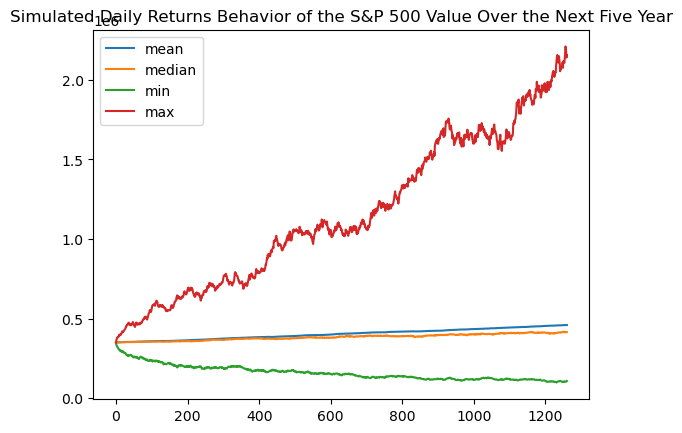

In [11]:
#plot the sum stats dataframe after multiplying by initial investment of 350,000
sp500_daily_returns_df = pd.DataFrame(simulated_returns_data_sp500)
initial_investment = 350000
sp500_pnl = initial_investment *sp500_daily_returns_df
sp500_pnl.plot(title="Simulated Daily Returns Behavior of the S&P 500 Value Over the Next Five Year")